In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [2]:
with open('../../output/weights/p_date=2022-08-03-05_38_29/log.json', 'r') as f:
    data = json.load(f)
    
l = len(data["loss"])
print(f"{l} records")
print(data.keys())

19001 records
dict_keys(['loss', 'mae', 'accuracy', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [3]:
# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-50_000:]
mean_loss = stat.mean(loss)
loss_filtered = { k: v for k, v in enumerate(loss) }#if v <= mean_loss }

# Mae
mae = [ v for v in data["mae"] if str(v) != "nan" ]#[-50_000:]
mean_mae = stat.mean(mae)
mae_filtered = { k: v for k, v in enumerate(mae) }# if v <= mean_mae }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-50_000:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ]#[-500:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"]) if str(v) != "nan" }

In [42]:
def plot(data, title, labelX, labelY):
    interval = 1000
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : stat.mean(list(data.values())[i:i+interval+1]) for i in range(0, len(data.values()), interval) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.title(title)
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    plt.show()
    
    previous = 0
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage = ((float(current)-previous)/previous)*100
            percent_list.append("+" if percentage > 0 else "" + str(math.trunc(((percentage)) + "% (" + str(math.trunc(float(current - previous))) + ")")
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average: {percent_list}")
    print(f"Minimum: {min(data.values())}")

SyntaxError: invalid syntax (678668443.py, line 21)

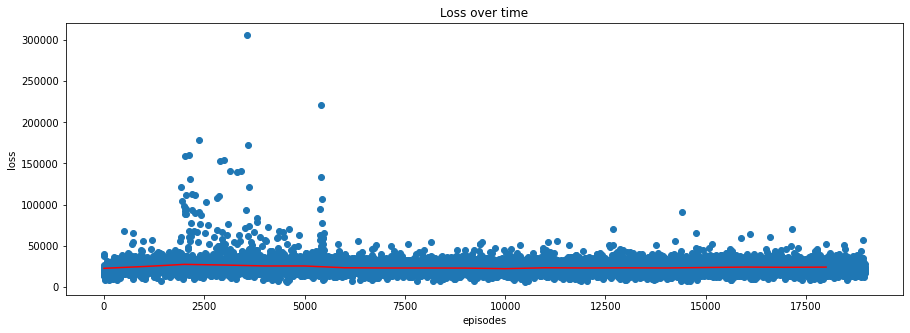

Maximum: 305870.15625
Average: 23732.716097431134
Moving Average: ['+9% (2172)', '+10% (2596)', '+-2% (-790)', '+-4% (-1126)', '+0% (-21)', '+-8% (-2175)', '+-1% (-290)', '+0% (-8)', '+0% (-98)', '+-3% (-681)', '+4% (1061)', '+-1% (-248)', '+0% (172)', '+0% (-170)', '+2% (575)', '+2% (528)', '+-1% (-289)', '+1% (242)']
Minimum: 5209.70751953125


In [41]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

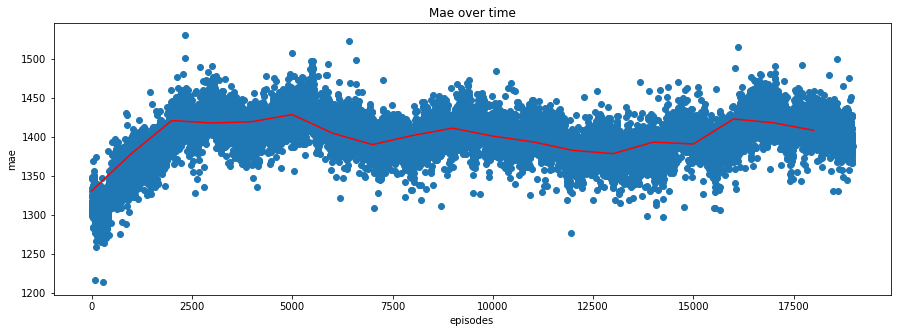

Maximum: 1530.2398681640625
Average: 1399.5681980594302
Moving Average: ['+100 (1000.0)', '+50 (1000.0)', '+33 (1000.0)', '+25 (1000.0)', '+20 (1000.0)', '+16 (1000.0)', '+14 (1000.0)', '+12 (1000.0)', '+11 (1000.0)', '+10 (1000.0)', '+9 (1000.0)', '+8 (1000.0)', '+7 (1000.0)', '+7 (1000.0)', '+6 (1000.0)', '+6 (1000.0)', '+5 (1000.0)']
Minimum: 1213.0626220703125


In [23]:
plot(mae_filtered, "Mae over time", "episodes", "mae")

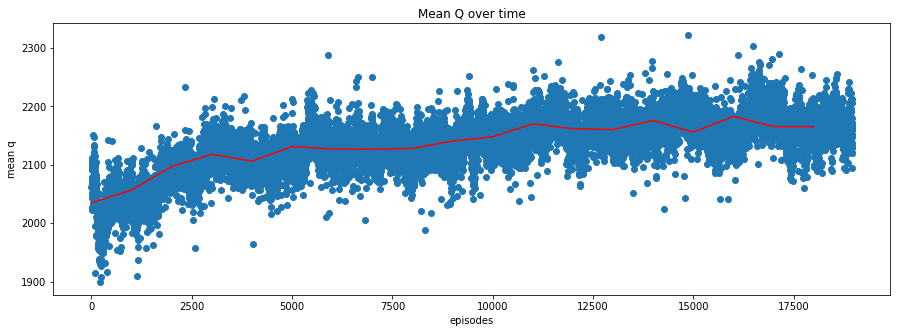

Maximum: 2321.509765625
Average: 2134.280343293482
Moving Average: ['+100 (1000.0)', '+50 (1000.0)', '+33 (1000.0)', '+25 (1000.0)', '+20 (1000.0)', '+16 (1000.0)', '+14 (1000.0)', '+12 (1000.0)', '+11 (1000.0)', '+10 (1000.0)', '+9 (1000.0)', '+8 (1000.0)', '+7 (1000.0)', '+7 (1000.0)', '+6 (1000.0)', '+6 (1000.0)', '+5 (1000.0)']
Minimum: 1898.6728515625


In [24]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

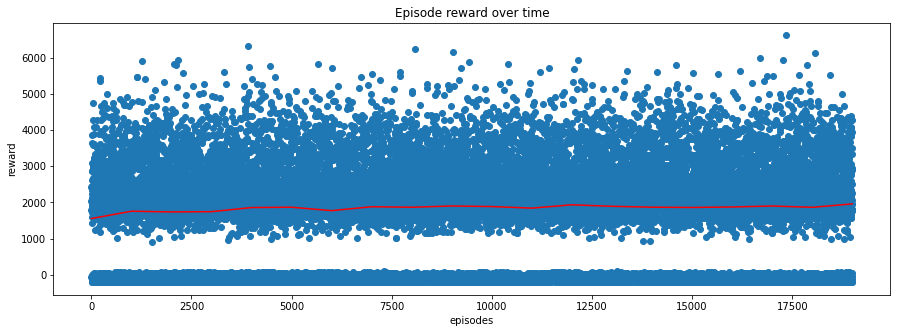

Maximum: 6613.833846153512
Average: 1834.7083493579476
Moving Average: ['+100 (1000.0)', '+50 (1000.0)', '+33 (1000.0)', '+25 (1000.0)', '+20 (1000.0)', '+16 (1000.0)', '+14 (1000.0)', '+12 (1000.0)', '+11 (1000.0)', '+10 (1000.0)', '+9 (1000.0)', '+8 (1000.0)', '+7 (1000.0)', '+7 (1000.0)', '+6 (1000.0)', '+6 (1000.0)', '+5 (1000.0)', '+5 (1000.0)']
Minimum: -211.69333333333333


In [25]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

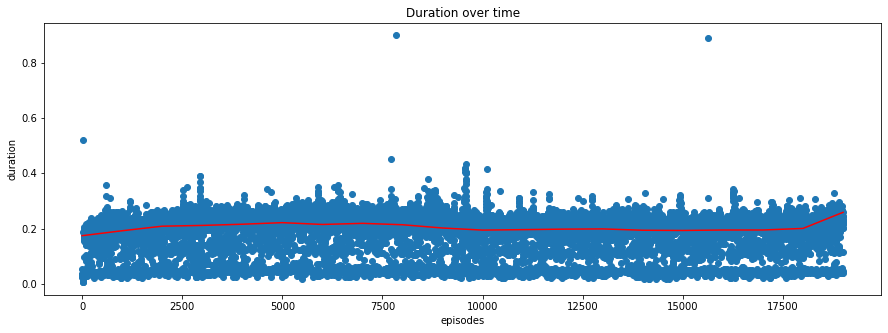

Maximum: 0.8991068160030409
Average: 0.20194485420354544
Moving Average: ['+100 (1000.0)', '+50 (1000.0)', '+33 (1000.0)', '+25 (1000.0)', '+20 (1000.0)', '+16 (1000.0)', '+14 (1000.0)', '+12 (1000.0)', '+11 (1000.0)', '+10 (1000.0)', '+9 (1000.0)', '+8 (1000.0)', '+7 (1000.0)', '+7 (1000.0)', '+6 (1000.0)', '+6 (1000.0)', '+5 (1000.0)', '+5 (1000.0)']
Minimum: 0.004967294000380207


In [26]:
plot(duration, "Duration over time", "episodes", "duration")

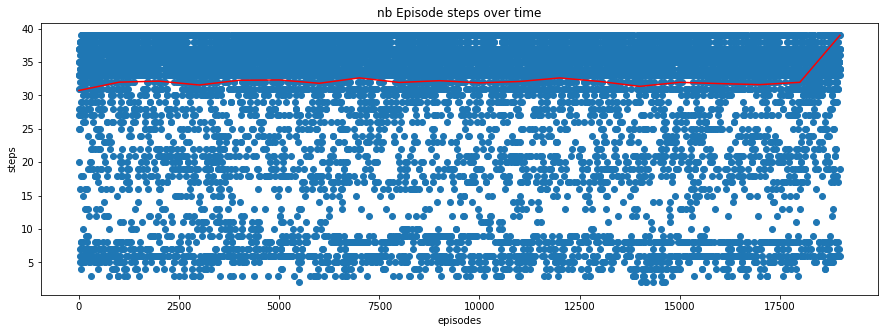

Maximum: 39
Average: 31.955160254723435
Moving Average: ['+100 (1000.0)', '+50 (1000.0)', '+33 (1000.0)', '+25 (1000.0)', '+20 (1000.0)', '+16 (1000.0)', '+14 (1000.0)', '+12 (1000.0)', '+11 (1000.0)', '+10 (1000.0)', '+9 (1000.0)', '+8 (1000.0)', '+7 (1000.0)', '+7 (1000.0)', '+6 (1000.0)', '+6 (1000.0)', '+5 (1000.0)', '+5 (1000.0)']
Minimum: 2


In [27]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")